In [1]:
from pycoingecko import CoinGeckoAPI
from pprint import pprint
import pandas as pd
import os

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt

# Get data from CoinGecko API

Pull the first 5 pages of coin data from the API.

In [29]:
cg = CoinGeckoAPI()

pages = [1]

coins = []
for page in pages:
    results = cg.get_coins_markets("usd", page=page)
    for coin in results:
        coins.append(coin)

In [30]:
stablecoins = ["usd", "eur", "dollar", "magic internet", "dai", "tether", "pax", "frax"]

for idx, coin in enumerate(coins):
    for stable in stablecoins:
        if stable in coin["name"].lower():
            coins.pop(idx)

In [31]:
len(coins)

88

In [39]:
df = pd.DataFrame(columns=["Name", "Symbol", "Price", "MarketCap", "CirculatingSupply", "TotalSupply", "Volume", "ATHChangePercent"])

for idx, coin in enumerate(coins):
    df.loc[idx] = [coin["name"], coin["symbol"].upper(), coin["current_price"], coin["market_cap"], coin["circulating_supply"], 
                   coin["total_supply"], coin["total_volume"], coin["ath_change_percentage"]]

df["CirculatingTotalRatio"] = (df["CirculatingSupply"] / df["TotalSupply"]).fillna(0)
# df["FDVtoMCAP_Ratio"] = df["FullyDilutedValuation"] / df["MarketCap"]

$$ D_R = FDV/DV - 1, C_P = ATH\%Change $$

$$ R = 1 / (D_R + C_P) $$

In [41]:
df.sort_values("CirculatingTotalRatio", ascending=False)

,Name,Symbol,Price,MarketCap,CirculatingSupply,TotalSupply,Volume,ATHChangePercent,CirculatingTotalRatio
51,IOTA,MIOTA,0.751366,2092343653,2.779530e+09,2779530283.0,3.540315e+07,-85.65821,1.0
44,Magic Internet Money,MIM,0.995283,2771718289,2.785297e+09,2785296692.97944,2.895224e+07,-4.41182,1.0
2,BNB,BNB,400.480000,67472205409,1.681370e+08,168137035.9,1.306430e+09,-41.52862,1.0
37,cETH,CETH,59.130000,3289708063,5.563332e+07,55633318.220355,3.007250e+03,-39.50728,1.0
38,Waves,WAVES,32.720000,3267707878,1.000000e+08,100000000.0,1.018789e+09,-24.03120,1.0
...,...,...,...,...,...,...,...,...,...
49,EOS,EOS,2.200000,2172003703,9.880327e+08,None,2.600958e+08,-90.32062,0.0
9,Dogecoin,DOGE,0.123558,16409127689,1.326708e+11,None,5.276319e+08,-83.09366,0.0
14,Cosmos Hub,ATOM,28.810000,8378936811,2.907148e+08,None,5.284957e+08,-35.03155,0.0
54,Theta Fuel,TFUEL,0.174042,1886178774,0.000000e+00,5301200000.0,1.378560e+07,-74.46194,0.0


In [43]:
df["Rank"] = df["CirculatingTotalRatio"] / abs(df["ATHChangePercent"])
#df = df[df["Volume"] > 50e6].sort_values("Rank", ascending=True)[:50]

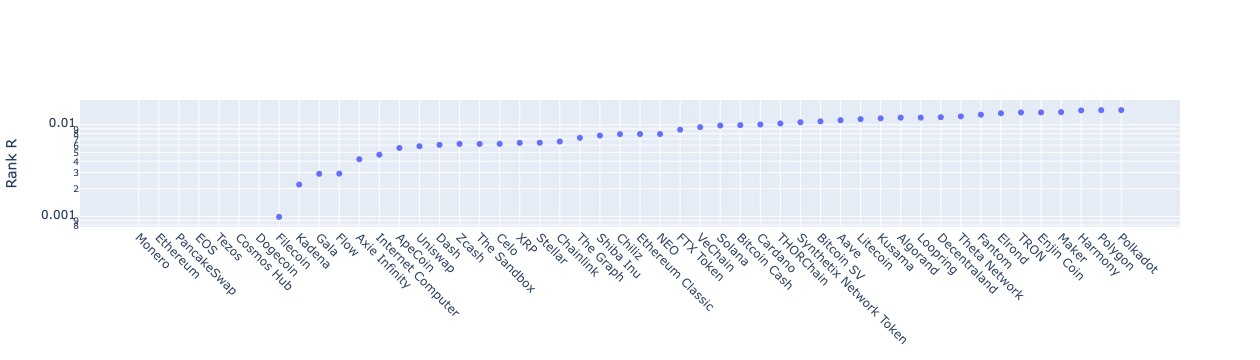

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Rank, mode='markers', hoverinfo="x"))

fig.update_yaxes(title_text="Rank R", type="log")
fig.update_xaxes(tickangle=45)

fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 1,
    )
)

fig.write_image(os.path.join("..", "images", "project_ranking.png"))
fig.write_html(os.path.join("..", "images", "project_ranking.html"))
fig.show()

In [ ]:
fig = go.Figure()

df1 = df[df.ATHChangePercent > -20]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))
fig.add_hline(
    y=df.iloc[0].ATHChangePercent,
    line_dash="dot",
)
fig.add_hline(
    y=df.iloc[1].ATHChangePercent,
    line_dash="dot",
)
#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
fig = go.Figure()

df1 = df[(df.ATHChangePercent > -20)]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))

#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
df["VolumeMarketCapRatio"] = df["Volume"] / df["MarketCap"]

In [ ]:
df.sort_values("VolumeMarketCapRatio", ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Volume, mode='markers'))
fig.add_hline(
    y=df.Volume.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.Volume.median() + df.Volume.std(),
    line_dash="dot",
)

fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.VolumeMarketCapRatio, mode='markers'))
fig.add_hline(
    y=df.VolumeMarketCapRatio.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.VolumeMarketCapRatio.median() + df.VolumeMarketCapRatio.std(),
    line_dash="dot",
)
fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)